In [ ]:
import sys
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn 
import xgboost as xgb

In [32]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("../data/preprocessed/trainig_data.csv")
y = pd.read_csv("../data/preprocessed/target_data.csv")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
y_train = y_train["yield_kg_per_hectare"]
y_test  = y_test["yield_kg_per_hectare"]

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 500, 1000],   # количество деревьев
    "max_depth": [None, 10, 20, 30],    # глубина деревьев
    "min_samples_split": [2, 5, 10],    # минимальное число объектов для сплита
    "min_samples_leaf": [1, 2, 4],      # минимальное число объектов в листе
    "max_features": ["auto", "sqrt"]    # количество признаков при сплите
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid = GridSearchCV(
    rf, param_grid, 
    cv=5, scoring="r2", verbose=2, n_jobs=-1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший R²:", grid.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\esimb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\esimb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\esimb\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\esimb\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\esimb\anaconda3\Lib\site-packag

Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Лучший R²: -0.04669321239457604


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} кг/га")
print(f"RMSE: {rmse:.2f} кг/га")
print(f"R²  : {r2:.3f}")


MAE : 1076.44 кг/га
RMSE: 1207.36 кг/га
R²  : -0.056


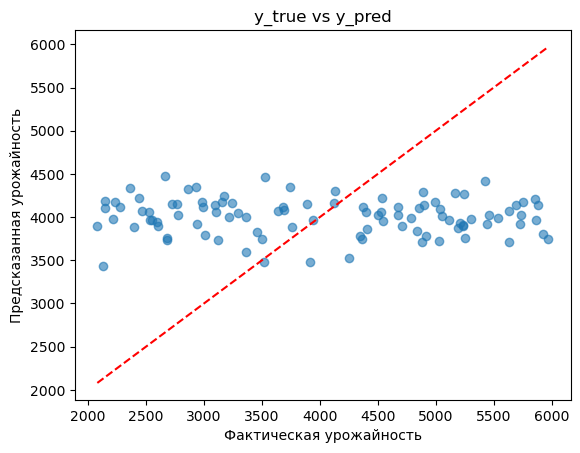

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Фактическая урожайность")
plt.ylabel("Предсказанная урожайность")
plt.title("y_true vs y_pred")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # линия идеала
plt.show()


In [65]:
import numpy as np
import pandas as pd

print("y_pred shape:", np.asarray(y_pred).shape)
print("y_test shape:", np.asarray(y_test).shape)

y_pred_1d = np.asarray(y_pred).ravel()     
y_test_1d = np.asarray(getattr(y_test, "values", y_test)).ravel()

results = pd.DataFrame({
    "Факт": y_test_1d,
    "Прогноз": y_pred_1d
})

results["Ошибка"] = results["Факт"] - results["Прогноз"]
results["Абс_ошибка"] = results["Ошибка"].abs()

print(results)


y_pred shape: (100,)
y_test shape: (100,)
       Факт      Прогноз       Ошибка   Абс_ошибка
0   5867.22  3970.817968  1896.402032  1896.402032
1   5252.74  3758.889082  1493.850918  1493.850918
2   5192.59  3868.318696  1324.271304  1324.271304
3   2980.51  4174.786146 -1194.276146  1194.276146
4   5235.26  3902.610473  1332.649527  1332.649527
..      ...          ...          ...          ...
95  5025.21  3727.983442  1297.226558  1297.226558
96  2858.28  4326.847852 -1468.567852  1468.567852
97  5878.35  4134.759620  1743.590380  1743.590380
98  3293.47  4051.813981  -758.343981   758.343981
99  5755.72  4175.466130  1580.253870  1580.253870

[100 rows x 4 columns]


In [47]:
y_test.head()

0    5867.22
1    5252.74
2    5192.59
3    2980.51
4    5235.26
Name: yield_kg_per_hectare, dtype: float64

In [49]:
X_train.head()

,Unnamed: 0,soil_moisture_%,soil_pH,pesticide_usage_ml,latitude,longitude,region_le,croptype_le,cropdisease_le,irrigation_type_le,fertilizer_type_le,sowing_month,sowing_season
0,249,26.46,5.88,39.71,21.520866,85.419919,2,3,0,3,0,2,1
1,433,38.82,7.20,13.25,15.992381,87.410792,4,3,1,2,1,3,2
2,19,16.99,7.34,19.77,19.991960,89.622994,4,2,2,3,0,1,1
3,322,25.20,5.94,6.80,23.278043,79.585387,3,1,2,2,2,2,1
4,332,41.36,7.44,36.01,12.921902,70.495912,0,0,0,2,0,3,2


In [66]:
bias = (y_pred - y_test).mean()
print("Средний сдвиг прогноза:", bias)


Средний сдвиг прогноза: -4.800768600164361


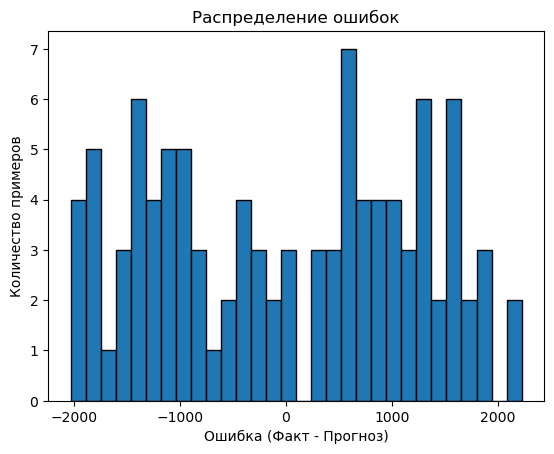

In [67]:
import matplotlib.pyplot as plt

plt.hist(y_test - y_pred, bins=30, edgecolor="black")
plt.title("Распределение ошибок")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Количество примеров")
plt.show()


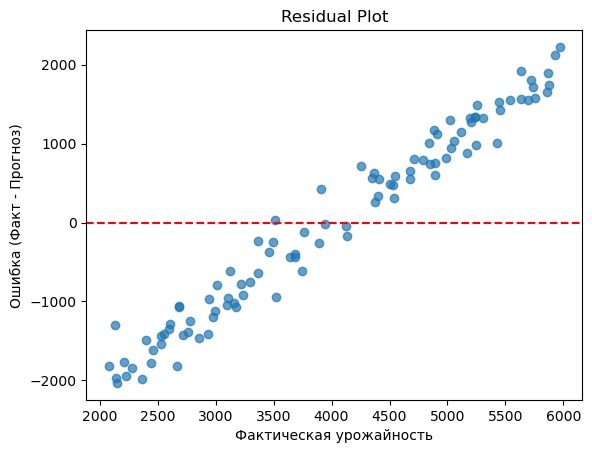

In [68]:
plt.scatter(y_test, y_test - y_pred, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Фактическая урожайность")
plt.ylabel("Ошибка (Факт - Прогноз)")
plt.title("Residual Plot")
plt.show()


RandomForest: Средний R² = -0.073, Std = 0.064
XGBoost: Средний R² = -0.211, Std = 0.103
